In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime

/Users/markhendricks/Projects/finm-markets-2023/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
SAVE_DATA = True

STARTDATE = '2000-01-01'
ENDDATE = '2023-08-31'

In [3]:
startdate = pd.to_datetime(STARTDATE)
enddate = pd.to_datetime(ENDDATE)

series = {
    'EXCSRESNW':'Excess Reserves',
    'IOER':'Interest Rate on Excess Reserves',
    'IORB': 'Interest Rate on Reserves',
    'DPCREDIT':'Discount Window Rate',
    'DFEDTARU':'Fed Funds Target - Upper Limit',
    'DFEDTARL':'Fed Funds Target - Lower Limit',
    'EFFR':'Effective Federal Funds Rate',
    'RPONTSYD': 'OMC Repo Treasury Purchased',
    'RRPONTSYD': 'OMC Reverse Repo Treasury Sold',
}


ticks = list(series.keys())
labs = list(series.values())

In [4]:
data = pdr.DataReader(ticks,'fred',startdate,enddate)
data.index.name = 'date'
data.index = pd.to_datetime(data.index)

In [5]:
info = pd.DataFrame(index=ticks, data=labs)
info.index.name = 'ticker (FRED)'
info.columns = ['description']
info

,description
ticker (FRED),
EXCSRESNW,Excess Reserves
IOER,Interest Rate on Excess Reserves
IORB,Interest Rate on Reserves
DPCREDIT,Discount Window Rate
DFEDTARU,Fed Funds Target - Upper Limit
DFEDTARL,Fed Funds Target - Lower Limit
EFFR,Effective Federal Funds Rate
RPONTSYD,OMC Repo Treasury Purchased
RRPONTSYD,OMC Reverse Repo Treasury Sold


In [6]:
if SAVE_DATA:
    outfile = '../data/fed_data.xlsx'
    with pd.ExcelWriter(outfile) as writer:  
        info.to_excel(writer, sheet_name= 'info', index=True)
        data.to_excel(writer, sheet_name= 'data', index=True)

***

In [7]:
startdate = pd.to_datetime(STARTDATE)
enddate = pd.to_datetime(ENDDATE)

series = {
    'WSHOTSA':'Treasuries',
    'WMBSEC':'MBS',
    'WCURCIR': 'Currency',
    'WLRRAA': 'Reverse Repo',
}


ticks = list(series.keys())
labs = list(series.values())

In [8]:
data = pdr.DataReader(ticks,'fred',startdate,enddate)
data.index.name = 'date'
data.index = pd.to_datetime(data.index)

In [9]:
info = pd.DataFrame(index=ticks, data=labs)
info.index.name = 'ticker (FRED)'
info.columns = ['Fed Balance Sheet (millions USD)']
info

,Fed Balance Sheet (millions USD)
ticker (FRED),
WSHOTSA,Treasuries
WMBSEC,MBS
WCURCIR,Currency
WLRRAA,Reverse Repo


Currency is reported in billions. The other series are reported in millions.

In [10]:
data['WCURCIR'] *= 1000
data *= 1e6

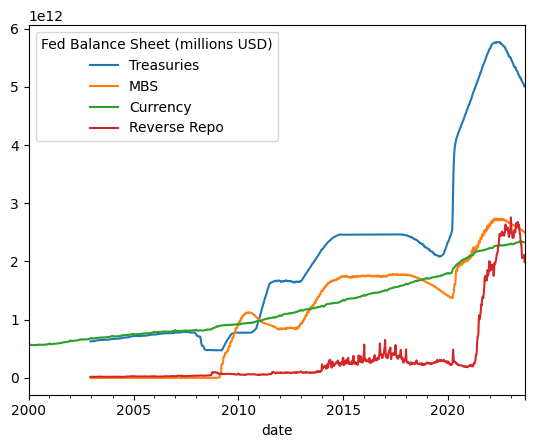

In [11]:
data.columns = info['Fed Balance Sheet (millions USD)']
data.plot();

In [12]:
if SAVE_DATA:
    outfile = '../data/fed_bs.xlsx'
    with pd.ExcelWriter(outfile) as writer:  
        info.to_excel(writer, sheet_name= 'info', index=True)
        data.to_excel(writer, sheet_name= 'data', index=True)